**Import Data**

In [36]:
# import appropriate packages
import numpy as np
import pandas as pd
import seaborn as sns 

In [37]:
# read the excel file
# had to install the xlrd package to read the file 
df = pd.read_csv("clean_data_kerry.csv", index_col=0)
df.head(10)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,T5,S1,S2,S3,P(mid),Y1,Y2,C3p,C5p,C6p
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,690.0,62.0,117.0,139.0,9.0,0,1,0,3.864345,11.111111
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,1120.0,71.0,242.0,237.0,9.0,1,0,1,12.028832,0.000000
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,325.0,61.0,33.0,60.0,13.0,1,0,1,3.369134,0.000000
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,509.0,80.0,59.0,110.0,15.0,1,1,1,3.299697,0.000000
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,720.0,67.0,149.0,167.0,20.0,0,1,0,3.726269,5.000000
5,ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.200000,94.0,1.0,0.06,...,815.0,62.0,96.0,181.0,13.5,0,1,0,5.724394,0.000000
6,ACOR,ACORDA THERAPEUTICS INC,2836,6.0,13.0,11.0,6.720000,128.0,1.0,-1.87,...,698.0,82.0,106.0,135.0,12.0,1,1,1,3.463095,0.000000
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5.0,14.0,12.0,4.550000,91.0,0.0,-0.74,...,-1.0,55.0,120.0,122.0,13.0,1,0,1,2.421469,0.000000
8,ACTV,ACTIVE NETWORK INC,7372,15.0,18.0,16.0,15.900000,100.0,1.0,-0.51,...,917.0,58.0,124.0,234.0,17.0,1,1,1,4.816591,0.000000
9,ACW,ACCURIDE CORP,3714,9.0,19.0,17.0,0.000000,106.0,1.0,1.49,...,459.0,81.0,90.0,147.0,18.0,1,0,0,3.056608,0.000000


**Examining the DataFrame**

In [38]:
# loooking for missing values
print(df.isnull().sum(axis=0).tolist())

# we know this output is not entirely accurate 

[0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [39]:
# replace '-' with NaN
df.replace(to_replace='-', value=np.nan, inplace=True)
#df.head(10)

In [40]:
# count of number of missing records in each column
'''val = []
for col in df.columns:
    val.append(df[df.columns].isnull().sum())
    break
print(val)'''

print(df.isnull().sum(axis=0).tolist())

# know we know how many values are missing in each column

[0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


**Descriptive Stats - Before Imputation**

In [41]:
# Show distribution of all variables to identify if normalization is needed
# Can also determine if median or mode is used for imputation 
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('ggplot')

**Imputation**

In [42]:
# replace null value with mean
# does not take into account that C2 is a binary variable > how to fix that? 
# also doesn't do anything for I3 > is this actually a problem? 
for value in df.columns:
    df.fillna(df.mean(), inplace=True)
print(df.isnull().sum(axis=0).tolist())

[0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


**Add New Columns**

In [43]:
# calculate P(mid)
df['P(mid)'] = (df['P(H)']+df['P(L)'])/2
#df.head()

In [44]:
# add Y1 column with for loop

'''y1 = []
for x in df['P(IPO)']:
    if x < df['P(mid)']:
        yl.append('1')
    else:
        y1.append('0')

df['Y1'] = y1 
df.head()'''

"y1 = []\nfor x in df['P(IPO)']:\n    if x < df['P(mid)']:\n        yl.append('1')\n    else:\n        y1.append('0')\n\ndf['Y1'] = y1 \ndf.head()"

In [45]:
# add new columns Y1, Y2, C3', C5', C6'

df['Y1'] = np.where(df['P(IPO)']<df['P(mid)'], 1,0)
df['Y2'] = np.where(df['P(IPO)']<df['P(1Day)'], 1,0)
df['C3p'] = np.where(df['C3']<0, 1,0)
df['C5p'] = df['C5']/df['C6']
df['C6p'] = np.where(df['P(IPO)']>df['P(mid)'], (((df['P(IPO)'] - df['P(mid)']))/df['P(mid)']) * 100,0)

#df.head()

**Creating Target Variables**

In [46]:
# Define a pmid column to utilize later
def Pmid(row):
    return (row['P(H)'] + row['P(L)'])/2

# add a new column with the values returned from the previous function
df['Pmid'] = df.apply(lambda row: Pmid(row),axis=1)

In [47]:
# Define Pre-IPO Revision
def Y1Func(row):
    if row['P(IPO)'] < row['Pmid']:
        return 1
    return 0

# add a new column with the values returned from the previous function
df['Y1'] = df.apply(lambda row: Y1Func(row),axis=1)


In [48]:
# Define Post-IPO Initial Return
def Y2Func(row):
    if row['P(IPO)'] < row['P(1Day)']:
        return 1
    return 0
# add a new column with the values returned from the previous function
df['Y2'] = df.apply(lambda row: Y2Func(row),axis=1)

**Creating Control Variables**

In [49]:
# Define Positive EPS Dummy
def C3pFunc(row):
    if row['C3'] > 0:
        return 1
    return 0
# add a new column with the values returned from the previous function
df['C3p'] = df.apply(lambda row: C3pFunc(row),axis=1)


In [50]:
# Define Share Overhang
def C5pFunc(row):
    return row['C5']/row['C6']
    
# add a new column with the values returned from the previous function
df['C5p'] = df.apply(lambda row: C5pFunc(row),axis=1)


In [51]:
# Define Up Revision
def C6pFunc(row):
    if row['P(IPO)'] > row['Pmid']:
        return 100*(row['P(IPO)']-row['Pmid'])/row['Pmid']
    return 0
    
# add a new column with the values returned from the previous function
df['C6p'] = df.apply(lambda row: C6pFunc(row),axis=1)

**Creating Ratio Variables**

In [52]:
# Define Long Sentences
def LongSentences(row):
    return row['T4']/row['T1']
    
# add a new column with the values returned from the previous function
df['LongSentences'] = df.apply(lambda row: LongSentences(row),axis=1)

In [53]:
# Define Real Words
def RealWords(row):
    if row['T2'] == 0 :
        return 0
    else: 
        return row['T3']/row['T2']

# add a new column with the values returned from the previous function
df['RealWords'] = df.apply(lambda row: RealWords(row),axis=1)


In [54]:
# Define Long Words
def LongWords(row):
    if row['T2'] == 0 :
        return 0
    else: 
        return row['T5']/row['T2']
    
# add a new column with the values returned from the previous function
df['LongWords'] = df.apply(lambda row: LongWords(row),axis=1)

In [55]:
# Define Positive Words
def PositiveWords(row):
    if row['T2'] == 0 :
        return 0
    else: 
        return row['S1']/row['T2']
    
# add a new column with the values returned from the previous function
df['PositiveWords'] = df.apply(lambda row: PositiveWords(row),axis=1)

In [56]:
# Define Negative Words
def NegativeWords(row):
    if row['T2'] == 0 :
        return 0
    else: 
        return row['S2']/row['T2']
    
# add a new column with the values returned from the previous function
df['NegativeWords'] = df.apply(lambda row: NegativeWords(row),axis=1)

In [57]:
# Define Uncertain Words
def UncertainWords(row):
    if row['T2'] == 0 :
        return 0
    else: 
        return row['S3']/row['T2']
    
# add a new column with the values returned from the previous function
df['UncertainWords'] = df.apply(lambda row: UncertainWords(row),axis=1)

**Correlation**

In [58]:
#Want to see the correlation of every variable using the Spearman method 
df.corr(method='spearman')

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,...,C3p,C5p,C6p,Pmid,LongSentences,RealWords,LongWords,PositiveWords,NegativeWords,UncertainWords
P(IPO),1.000000,0.802979,0.804473,0.582183,-0.093019,0.324908,0.164967,-0.002199,0.356442,0.394747,...,0.159556,0.029941,0.501092,0.804084,0.005913,-0.123574,-0.085290,-0.001241,0.038547,-0.087488
P(H),0.802979,1.000000,0.996201,0.400363,-0.079425,0.314006,0.141113,-0.039367,0.375482,0.448430,...,0.143288,-0.012130,0.061073,0.999161,0.072445,-0.107998,-0.048972,0.073623,0.114363,-0.098225
P(L),0.804473,0.996201,1.000000,0.403342,-0.076105,0.323380,0.147434,-0.043298,0.379858,0.454857,...,0.149272,-0.015923,0.066047,0.998664,0.074791,-0.111354,-0.050085,0.077807,0.116592,-0.102988
P(1Day),0.582183,0.400363,0.403342,1.000000,0.000242,0.136804,0.108433,-0.000759,0.204285,0.173360,...,0.071056,0.104015,0.414471,0.401954,0.015638,-0.049622,-0.057964,-0.002748,0.002780,0.021669
C1,-0.093019,-0.079425,-0.076105,0.000242,1.000000,-0.050551,0.074850,0.090591,0.043445,-0.005613,...,0.033582,0.022536,-0.063910,-0.077910,0.051172,-0.057372,0.034281,0.030813,0.048133,-0.026479
C2,0.324908,0.314006,0.323380,0.136804,-0.050551,1.000000,-0.102172,-0.026477,0.420057,0.401315,...,-0.060065,0.116198,0.149893,0.319678,0.033971,0.006982,0.141495,0.038699,0.009516,0.004402
C3,0.164967,0.141113,0.147434,0.108433,0.074850,-0.102172,1.000000,0.009780,0.134175,0.179379,...,0.864608,-0.010733,0.102615,0.143315,0.086850,-0.132931,-0.297572,0.024877,-0.031130,-0.148341
C4,-0.002199,-0.039367,-0.043298,-0.000759,0.090591,-0.026477,0.009780,1.000000,-0.018346,0.011430,...,-0.024635,-0.045855,0.093405,-0.040750,0.082422,0.051702,0.052700,-0.000665,0.000165,0.035316
C5,0.356442,0.375482,0.379858,0.204285,0.043445,0.420057,0.134175,-0.018346,1.000000,0.761999,...,0.117511,0.451139,0.157106,0.377778,0.225925,-0.005665,0.061094,0.054845,0.121706,-0.078621
C6,0.394747,0.448430,0.454857,0.173360,-0.005613,0.401315,0.179379,0.011430,0.761999,1.000000,...,0.161186,-0.131179,0.089995,0.451477,0.176610,-0.069877,-0.033127,0.052992,0.162554,-0.118416


In [59]:
#Testing to see which variables are highly correlated to our target variables (Y1 & Y2)
##Highly correlated being > 0.5
Target_1 = df.corr(method='spearman')['Y1'] > 0.5
Target_1

P(IPO)            False
P(H)              False
P(L)              False
P(1Day)           False
C1                False
C2                False
C3                False
C4                False
C5                False
C6                False
C7                False
T1                False
T2                False
T3                False
T4                False
T5                False
S1                False
S2                False
S3                False
P(mid)            False
Y1                 True
Y2                False
C3p               False
C5p               False
C6p               False
Pmid              False
LongSentences     False
RealWords         False
LongWords         False
PositiveWords     False
NegativeWords     False
UncertainWords    False
Name: Y1, dtype: bool

In [60]:
#Testing to see which variables are highly correlated to our target variables (Y1 & Y2)
##Highly correlated being > 0.5
Target_2 = df.corr(method='spearman')['Y2'] > 0.5
Target_2

P(IPO)            False
P(H)              False
P(L)              False
P(1Day)           False
C1                False
C2                False
C3                False
C4                False
C5                False
C6                False
C7                False
T1                False
T2                False
T3                False
T4                False
T5                False
S1                False
S2                False
S3                False
P(mid)            False
Y1                False
Y2                 True
C3p               False
C5p               False
C6p               False
Pmid              False
LongSentences     False
RealWords         False
LongWords         False
PositiveWords     False
NegativeWords     False
UncertainWords    False
Name: Y2, dtype: bool

**Correlation Heatmap**

Text(0.5, 1.0, 'Correlation Heatmap')

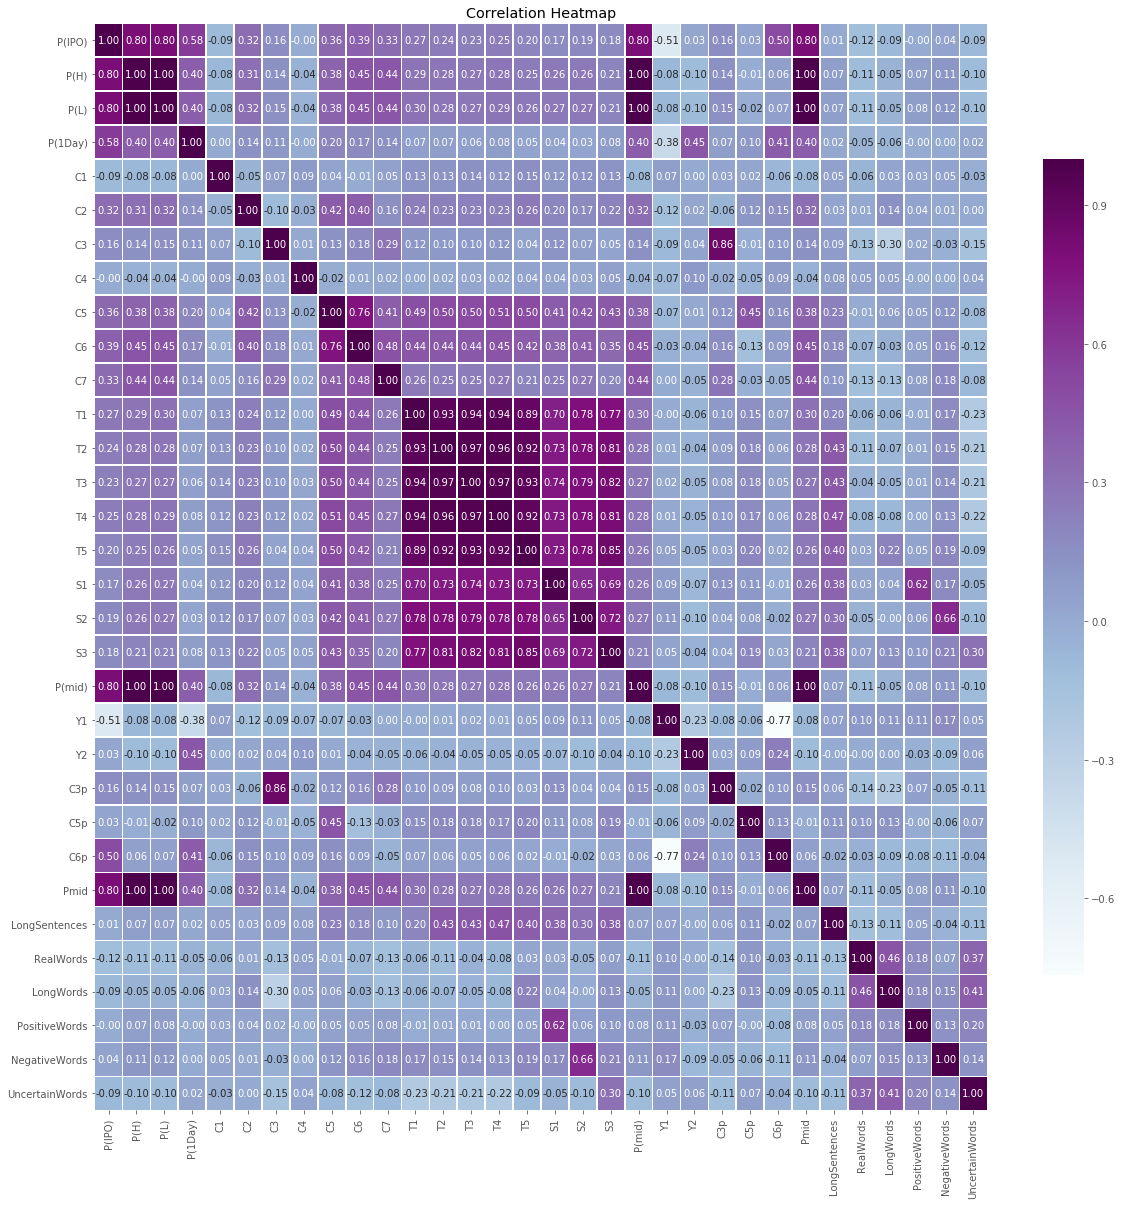

In [61]:
#Created a figure and are able to adjust the size of the graph
plt.figure(figsize = (20,20))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method
##Added the annotation so that the numbers appear in each box
display = sns.heatmap(df.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap')

In [62]:
#Dropped columns that were very highly correlated to each other (i.e. correlation > 0.5). 
##Kept one of each of the highly correlated variable
df = df.drop(columns = ['P(H)', 'P(L)', 'P(mid)', 'T1', 'T2', 'T3', 'T4', 'S1', 'S2', 'C5'], axis=1)

Text(0.5, 1.0, 'Correlation Heatmap')

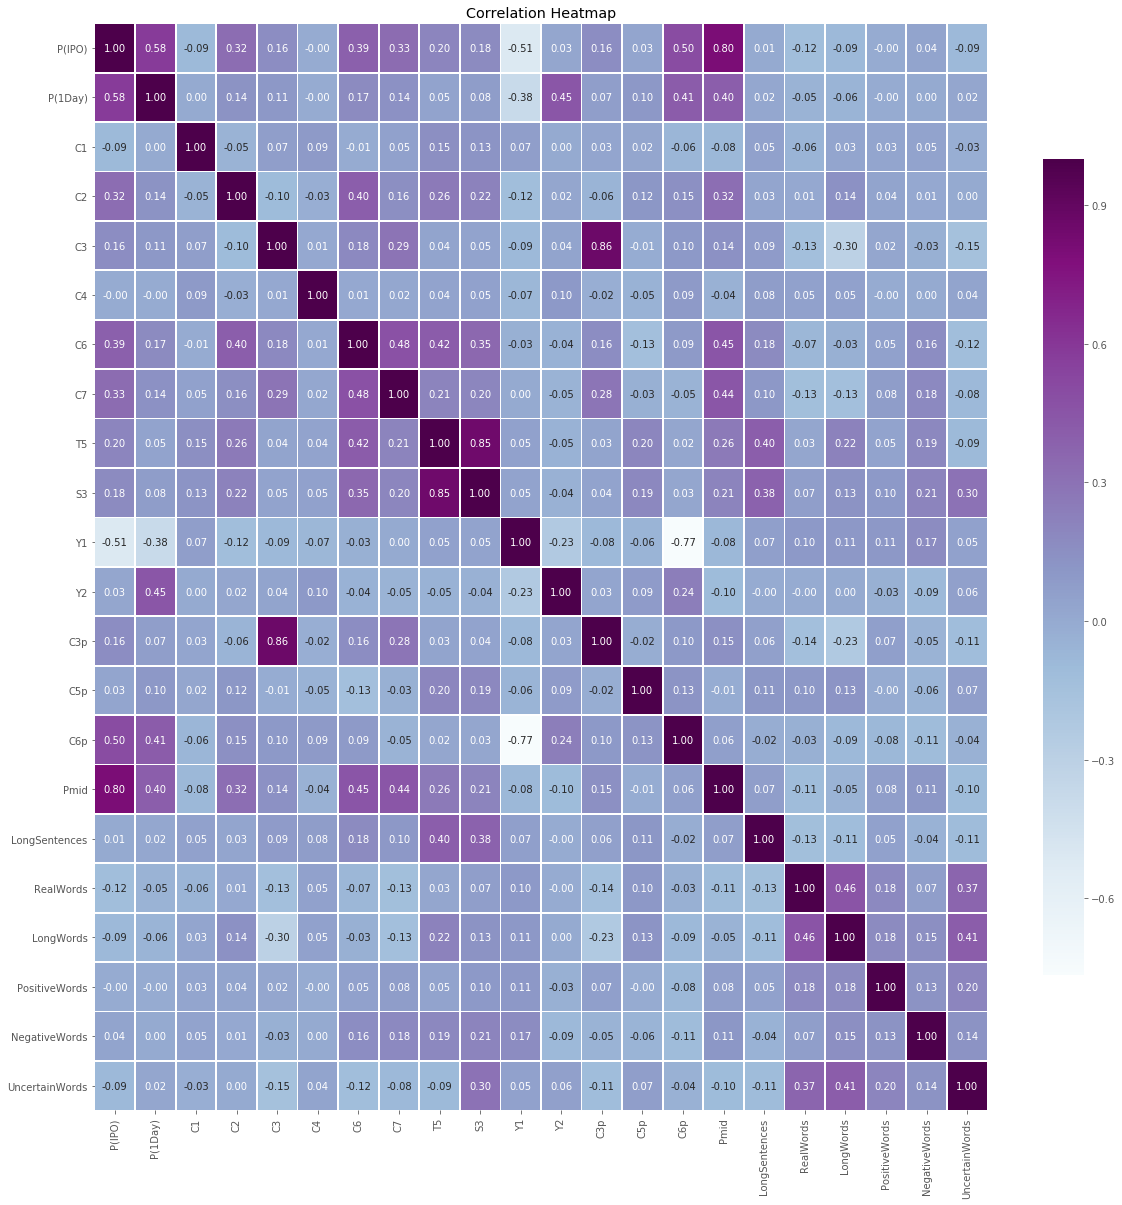

In [63]:
#Recreated our heatmap to see how the chart is different 
#Created a figure and are able to adjust the size of the graph
plt.figure(figsize = (20,20))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method
##Added the annotation so that the numbers appear in each box
display = sns.heatmap(df.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap')

In [64]:
df.to_csv('Correlation_Mike.csv')